In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import os

env = os.environ.get('Environment')
print(f"Environment: {env!r}")

Environment: 'prod'


In [2]:
%reload_ext jupyter_dmdg

In [3]:
%%athena_to_df --out SIPENOX_md
SELECT tag_id, source_name
FROM "prod_plant_connectivity_prepared_data"."tag_metadata"
WHERE site_id = 'SIP' AND building_id = 'ENOX'

In [4]:
sn = input("Enter part of the source_name: ")
associated_tag_ids = SIPENOX_md[SIPENOX_md['source_name'].str.contains(sn)]
associated_tag_ids = associated_tag_ids.reset_index(drop=True)

Enter part of the source_name:  24302


In [5]:
associated_tag_ids

,tag_id,source_name
0,SIPENOX-DPY004-PEC4300-FQR4302.PEC-PEC-VOL-CTR,ns=2;s=Enox.PLC 14.pcnr_LIAS24302
1,SIPENOX-ENOST4-R024300-LS24302.REA-DEP-VOL-CTR,ns=2;s=Enox.PLC 14.pcnr_LIAS24302
2,SIPENOX-DPY004-PEC4300-FQI4302.PEC-PEC-VOL-CTR,ns=2;s=Enox.PLC 14.pcnr_LIAS24302
3,SIPENOX-ENOST4-R024300-LS24302.REA-DEP-VOL-CTR,ns=2;s=Enox.PLC 14.pcnr_LIAS24302


In [6]:
tag_ids = associated_tag_ids['tag_id'].tolist()
tag_ids_str = "','".join(tag_ids)
query_string = f'''
    SELECT tag_id, ts, value
    FROM "prod_plant_connectivity_prepared_data"."tag_timeserie"
    WHERE site_id = 'SIP' AND building_id = 'ENOX' AND tag_id IN ('{tag_ids_str}')
'''
get_ipython().run_cell_magic('athena_to_df', '--out values4the_entered_sensor', query_string)

In [7]:
values4the_entered_sensor

,tag_id,ts,value
0,SIPENOX-DPY004-PEC4300-FQR4302.PEC-PEC-VOL-CTR,2023-03-16 19:17:49,17695.0
1,SIPENOX-DPY004-PEC4300-FQR4302.PEC-PEC-VOL-CTR,2023-03-16 19:18:42,17696.0
2,SIPENOX-DPY004-PEC4300-FQR4302.PEC-PEC-VOL-CTR,2023-03-16 19:53:21,17708.0
3,SIPENOX-DPY004-PEC4300-FQR4302.PEC-PEC-VOL-CTR,2023-03-16 19:26:30,17695.0
4,SIPENOX-DPY004-PEC4300-FQR4302.PEC-PEC-VOL-CTR,2023-03-16 19:28:54,17695.0
...,...,...,...
1550808,SIPENOX-ENOST4-R024300-LS24302.REA-DEP-VOL-CTR,2022-10-01 13:11:17,17638.0
1550809,SIPENOX-ENOST4-R024300-LS24302.REA-DEP-VOL-CTR,2022-10-01 13:22:44,17639.0
1550810,SIPENOX-ENOST4-R024300-LS24302.REA-DEP-VOL-CTR,2022-10-01 13:23:15,17639.0
1550811,SIPENOX-ENOST4-R024300-LS24302.REA-DEP-VOL-CTR,2022-10-01 13:39:17,17660.0


In [8]:
values4the_entered_sensor.sort_values(by='ts', ascending=False, inplace=True)
values4the_entered_sensor['ts'] = pd.to_datetime(values4the_entered_sensor['ts'])
current_tag_id = values4the_entered_sensor.iloc[0]['tag_id']
values4the_entered_sensor['tag_id'] = current_tag_id
values4the_entered_sensor

,tag_id,ts,value
1011685,SIPENOX-DPY004-PEC4300-FQR4302.PEC-PEC-VOL-CTR,2023-06-16 00:58:55,0.0
1011922,SIPENOX-DPY004-PEC4300-FQR4302.PEC-PEC-VOL-CTR,2023-06-16 00:58:54,16400.0
1012423,SIPENOX-DPY004-PEC4300-FQR4302.PEC-PEC-VOL-CTR,2023-06-16 00:58:53,16636.0
1012054,SIPENOX-DPY004-PEC4300-FQR4302.PEC-PEC-VOL-CTR,2023-06-16 00:58:52,16704.0
1012127,SIPENOX-DPY004-PEC4300-FQR4302.PEC-PEC-VOL-CTR,2023-06-16 00:58:51,16761.0
...,...,...,...
364675,SIPENOX-DPY004-PEC4300-FQR4302.PEC-PEC-VOL-CTR,2022-08-16 05:51:27,17488.0
364505,SIPENOX-DPY004-PEC4300-FQR4302.PEC-PEC-VOL-CTR,2022-08-16 05:51:20,17487.0
364656,SIPENOX-DPY004-PEC4300-FQR4302.PEC-PEC-VOL-CTR,2022-08-16 05:51:16,17488.0
364655,SIPENOX-DPY004-PEC4300-FQR4302.PEC-PEC-VOL-CTR,2022-08-16 05:51:06,17490.0


In [9]:
pe_w_epn_entered = pd.read_csv('pe_w_epn_entered.csv')
Yes_or_No = input('Has pe_w_epn_entered got event_stop? ')

Has pe_w_epn_entered got event_stop?  Yes


In [10]:
if Yes_or_No == 'No':
    pe_w_epn_entered = pe_w_epn_entered.drop(pe_w_epn_entered.columns[0], axis=1)
    pe_w_epn_entered['event_start'] = pd.to_datetime(pe_w_epn_entered['event_start'])
    pe_w_epn_entered['event_stop'] = pe_w_epn_entered['event_start'] + pd.Timedelta(minutes=35)
else:
    pe_w_epn_entered['event_start'] = pd.to_datetime(pe_w_epn_entered['event_start'])
    pe_w_epn_entered['event_stop'] = pd.to_datetime(pe_w_epn_entered['event_stop'])

pe_w_epn_entered

,Unnamed: 0,batch_id,event_parameter_name,event_start,event_parameter_name_2,event_stop
0,0,23QEDB1042,411/04 - Charge Methanol R24300 (2nd charge) L...,2023-02-05 06:39:42,411/04 - Charge Methanol R24300 (2nd charge) R...,2023-02-05 06:43:55
1,1,23QEDE1190,411/04 - Charge Methanol R24300 (2nd charge) L...,2023-05-15 21:48:09,411/04 - Charge Methanol R24300 (2nd charge) R...,2023-05-15 21:52:32
2,2,23QEDE1019,411/04 - Charge Methanol R24300 (2nd charge) L...,2023-01-16 14:04:23,411/04 - Charge Methanol R24300 (2nd charge) R...,2023-01-16 14:08:46
3,3,23QEDB1038,411/04 - Charge Methanol R24300 (2nd charge) L...,2023-02-02 09:15:44,411/04 - Charge Methanol R24300 (2nd charge) R...,2023-02-02 09:20:32
4,4,23QEDB1054,411/04 - Charge Methanol R24300 (2nd charge) L...,2023-02-14 05:36:30,411/04 - Charge Methanol R24300 (2nd charge) R...,2023-02-14 05:40:52
...,...,...,...,...,...,...
219,219,23QEDB1167,411/04 - Charge Methanol R24300 (2nd charge) L...,2023-05-02 06:16:06,411/04 - Charge Methanol R24300 (2nd charge) R...,2023-05-02 06:20:22
220,220,23QEDB1011,411/04 - Charge Methanol R24300 (2nd charge) L...,2023-01-11 23:47:26,411/04 - Charge Methanol R24300 (2nd charge) R...,2023-01-11 23:52:10
221,221,22QEDB1151,411/04 - Charge Methanol R24300 (2nd charge) L...,2022-04-14 19:03:34,411/04 - Charge Methanol R24300 (2nd charge) R...,2022-04-14 19:08:20
222,222,22QEDB1008,411/04 - Charge Methanol R24300 (2nd charge) L...,2022-01-05 00:11:10,411/04 - Charge Methanol R24300 (2nd charge) R...,2022-01-05 00:15:36


In [11]:
pe_w_epn_entered = pe_w_epn_entered.sort_values('event_start')
values4the_entered_sensor = values4the_entered_sensor.sort_values('ts')
merged_df = pd.merge_asof(values4the_entered_sensor, pe_w_epn_entered, left_on='ts', right_on='event_start')

In [12]:
sensor_vs_batch = merged_df[(merged_df['ts'] >= merged_df['event_start']) & (merged_df['ts'] <= merged_df['event_stop'])]
sensor_vs_batch.to_csv('sensor_vs_batch.csv')

In [13]:
full_sensor_vs_batch = sensor_vs_batch.copy()
full_sensor_vs_batch = sensor_vs_batch.set_index('ts')
full_sensor_vs_batch = full_sensor_vs_batch.groupby('batch_id').apply(lambda group: group.resample('S').pad())
full_sensor_vs_batch = full_sensor_vs_batch.reset_index(level='ts')
full_sensor_vs_batch.to_csv('full_sensor_vs_batch.csv', index=False)

In [14]:
unique_batch_ids = sensor_vs_batch['batch_id'].unique()
unique_batch_ids

array(['22QEDE1354', '22QEDB1363', '22QEDB1364', '22QEDB1378',
       '22QEDB1379', '22QEDB1380', '22QEDB1403', '22QEDA1407',
       '22QEDB1423', '22QEDB1424', '22QEDB1431', '22QEDB1432',
       '22QEDB1433', '22QEDB1436', '22QEDB1437', '22QEDB1446',
       '22QEDB1453', '22QEDB1458', '22QEDB1463', '22QEDB1464.',
       '22QEDB1466', '22QEDB1467', '22QEDB1468', '22QEDB1469',
       '22QEDB1470', '22QEDB1471', '22QEDB1472', '22QEDB1473',
       '22QEDB1474', '22QEDB1475', '22QEDB1476', '22QEDB1477',
       '22QEDB1478', '22QEDB1479', '22QEDB1480', '22QEDB1481',
       '22QEDB1482', '22QEDB1483', '22QEDB1484', '22QEDB1485',
       '22QEDB1486', '22QEDB1487', '22QEDE1488', '22QEDE1489',
       '22QEDE1490', '22QEDE1491', '22QEDB1492', '22QEDB1493',
       '22QEDB1494', '22QEDE1495', '22QEDE1496', '22QEDE1497',
       '22QEDB1498', '23QEDE1001', '23QEDE1002', '23QEDE1003',
       '23QEDE1004', '23QEDE1005', '22QEDA1006', '23QEDB1007',
       '23QEDB1008', '23QEDB1009', '23QEDB1010', '23QE

Enter batch_id or part of it:  


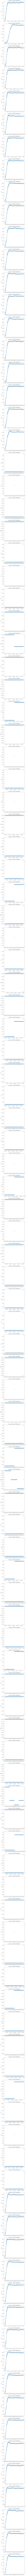

In [17]:
requested_batch_id = input("Enter batch_id or part of it: ")
matching_batch_ids = [batch_id for batch_id in unique_batch_ids if requested_batch_id in batch_id]
if len(matching_batch_ids) > 0:
    fig, axs = plt.subplots(len(matching_batch_ids), figsize=(7, 6*len(matching_batch_ids)))
    axs = np.ravel(axs)
    for i, batch_id in enumerate(matching_batch_ids):
        batch_data = full_sensor_vs_batch[full_sensor_vs_batch['batch_id'] == batch_id]
        ax = axs[i] 
        ax.scatter(batch_data['ts'], batch_data['value'])
        ax.set_xlabel('ts')
        ax.set_ylabel('value')
        ax.set_title(f'Scatter plot - Batch ID {batch_id}')
        ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    plt.tight_layout()
    plt.show()
else:
    print("No matching batch_id was found")